In [1]:
from buckley_leverette_ori import BuckleyLeverette 
import numpy as np

bl = BuckleyLeverette()

qt = 1.0 * np.random.rand(bl.nt)
# qt = np.ones(bl.nt) * 1.0
Sw = bl.Swinit.copy()

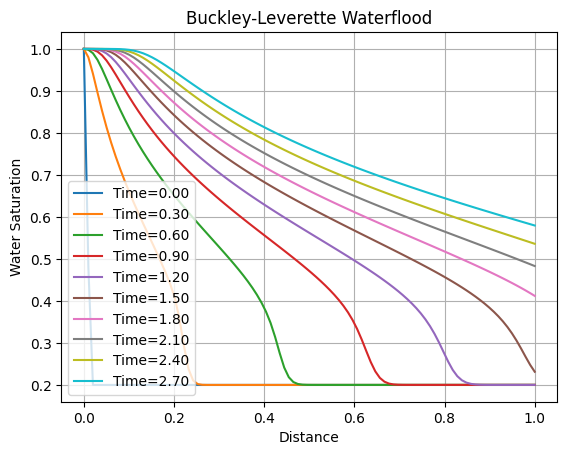

In [2]:
bl.simulate_w_plot(Sw, qt)
# bl.plot()

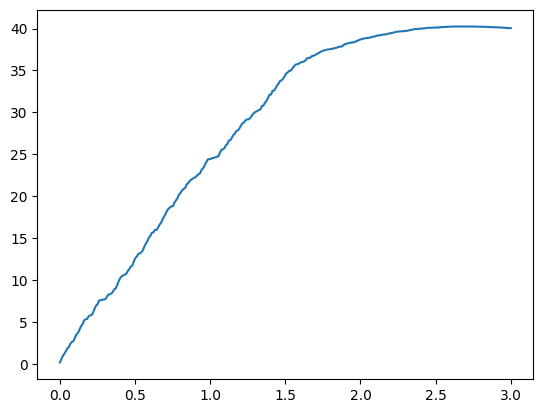

In [3]:
import matplotlib.pyplot as plt

npv = bl.cost_function(qt, Sw)

plt.plot(bl.t, npv)

# Model Predictive Control

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     9751
Number of nonzeros in inequality constraint Jacobian.:      100
Number of nonzeros in Lagrangian Hessian.............:     7426

Total number of variables............................:     2600
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2500
Total number of inequality constraints...............:      100
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -3.1149635e+01 4.10e-01 2.19e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

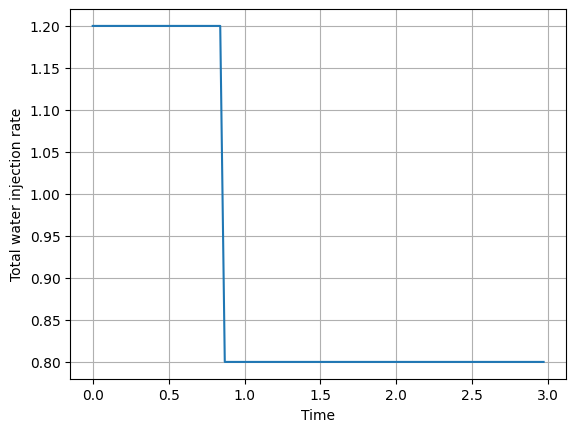

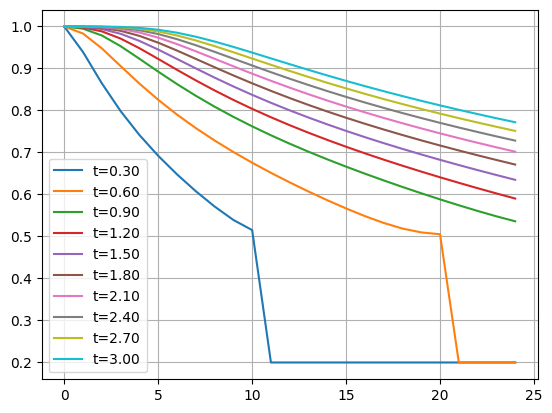

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from buckley_leverette import BuckleyLeverette 

from setup_bl import setup_bl_ocp, BLParamsMpc
from solver_ocp import SolverOcp

params_mpc = BLParamsMpc()
ocp = setup_bl_ocp(params_mpc)
solver = SolverOcp(ocp)


Sw0 = np.array([1.0]+[0.2]*(params_mpc.nx-1))  # initial state
qt = np.array([1.0]*params_mpc.N)  # initial guess for control

solver.set_initial_guess(Sw0, qt)
x_traj, u_traj = solver.solve(Sw0)

T = np.array(range(params_mpc.N))*params_mpc.dt

plt.figure()
plt.plot(T, u_traj.T)
plt.title('Optimal control trajectory')
plt.ylabel('Total water injection rate')
plt.xlabel('Time')
plt.grid(True)
plt.show()

for k in range(x_traj.shape[1]):
    if k==0:
        plt.figure()
    elif k%10==0:
        plt.plot(range(params_mpc.nx), x_traj[:,k], label=f't={k*params_mpc.dt:.2f}')

plt.title('Optimal state trajectory')
plt.ylabel("Water saturation")
plt.xlabel("Grid block")
plt.grid(True)
plt.legend()
plt.show()